In [1]:
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
import numpy as np
import useful_rdkit_utils as uru
from tqdm.auto import tqdm
import seaborn as sns

Enable Pandas **progress_apply**

In [2]:
tqdm.pandas()

Read data

In [3]:
df = pd.read_csv("zinc_sample.smi",sep=" ",names=["SMILES","Name"])

Generate fingerprints as numpy arrays from SMILES

In [4]:
df['fp'] = df.SMILES.progress_apply(uru.smi2numpy_fp)

  0%|          | 0/10000 [00:00<?, ?it/s]

Add an RDKit molecule column to a dataframe

In [5]:
df['mol'] = df.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/10000 [00:00<?, ?it/s]

Calculate fingerprints as numpy arrays from RDKit molecules

In [6]:
df['fp'] = df.mol.progress_apply(uru.mol2numpy_fp)

  0%|          | 0/10000 [00:00<?, ?it/s]

Generate a Morgan fingerprint column from SMILES

In [7]:
df['morgan'] = df.SMILES.progress_apply(uru.smi2morgan_fp)

  0%|          | 0/10000 [00:00<?, ?it/s]

Calcuate the Tanimoto similarity of the first molecule in dataframe to all molecules in a dataframe. 

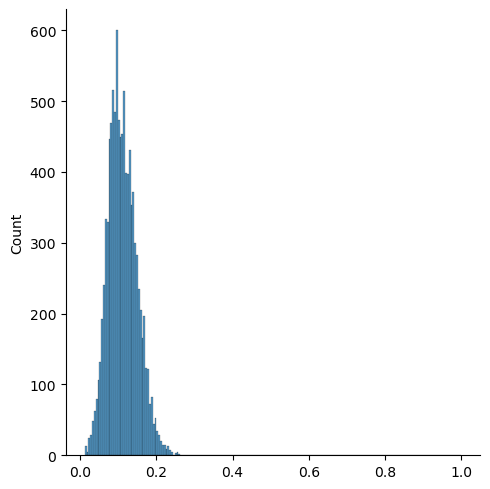

In [8]:
sim_list = DataStructs.BulkTanimotoSimilarity(df.morgan[0],df.morgan)
sns.displot(sim_list)

Instantiate an **RDKitDescriptors** object

In [9]:
rdkit_desc = uru.RDKitDescriptors()

Cacluate descriptors for a list of SMILES and return the result as a Pandas dataframe. 

In [10]:
desc_df = rdkit_desc.pandas_smiles(df.SMILES)

  0%|          | 0/10000 [00:00<?, ?it/s]

We can use the pandas **concat** function to combine the new descriptor dataframe with columns from our original dataframe.

In [11]:
combo_df = pd.concat([df[["SMILES","Name"]],desc_df],axis=1)
combo_df

,SMILES,Name,AvgIpc,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BCUT2D_MWHI,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,CC[C@@H]1CN(C(=O)[C@H](C)N2CCCCC2=O)C[C@H]1N1C...,107354824,3.058302,2.402503,-2.351561,2.268026,-2.512330,5.875189,-0.145800,16.477584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.766635
1,CC(C)(CN1CCCN(C(=O)c2ccncc2)CC1)c1ccccc1,97033829,2.875795,2.261880,-2.322227,2.243828,-2.397661,5.935862,0.076003,16.152947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.859482
2,CCc1ccccc1C(=O)NCc1nnc(C2CC2)n1C1CC1,97162066,3.508876,2.356858,-2.107162,2.441492,-2.254754,5.950977,0.094819,16.149188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.892036
3,C[C@@]1(C(=O)O)CCN(C(=O)C2(c3ccc(F)cc3)CCOCC2)C1,237642238,2.990661,2.489292,-2.389722,2.397240,-2.496027,5.894082,-0.147875,19.142144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.919485
4,CCOC(=O)c1sc(N2C(=O)C(=O)/C(=C(/O)c3ccc(OC(C)C...,102611003,3.361197,2.481865,-2.222012,2.433842,-2.289826,7.174628,-0.131996,32.133579,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.215823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CCCCCCCCOC(=O)[C@H](C)OC(=O)CCC(=O)O[C@@H](C)C...,104049842,2.807120,2.221348,-2.138908,2.080463,-2.281311,5.826370,-0.169436,16.600705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.119982
9996,COc1cccc(OC)c1C(=O)N[C@@H](C)c1cccnc1,74825532,2.540804,2.196604,-2.167138,2.282321,-2.271287,5.994747,0.093327,16.477202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.917442
9997,CCOCCC1(C(=O)Nc2ccc3oc(=O)n(C)c3c2)CCCC1,96476086,3.151169,2.402326,-2.271992,2.418040,-2.346137,5.964737,-0.126081,16.472522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.825211
9998,CCCC(=O)NC1=C(C(=O)OCC)C(=O)/C(=C/c2ccc(-c3ccc...,409082217,3.293775,2.356592,-2.058886,2.389789,-2.236499,8.079995,-0.139144,35.498263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315501


The **RDKitDescriptors**, **RDKitProperties**, and **Ro5Calculator** classes have a bit of error handling built in.  If any of these get and invalid molecule or SMILES, they reuturn a numpy array of [None]. Here's an example. 

In [15]:
error_df = pd.DataFrame({"SMILES" : ["CCCC","xyz","c1ccccc1C","CCO"],
                        "Name": ["butane","junk","toluene","ethanol"]})
error_df

,SMILES,Name
0,CCCC,butane
1,xyz,junk
2,c1ccccc1C,toluene
3,CCO,ethanol


Note how the second row is all **None**

In [16]:
error_smi_desc = rdkit_desc.pandas_smiles(error_df.SMILES)
error_smi_desc 

  0%|          | 0/4 [00:00<?, ?it/s]

[08:57:46] SMILES Parse Error: syntax error while parsing: xyz
[08:57:46] SMILES Parse Error: Failed parsing SMILES 'xyz' for input: 'xyz'


,AvgIpc,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BCUT2D_MWHI,BCUT2D_MWLOW,BalabanJ,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,1.370951,1.560299,-1.676333,1.763305,-1.473316,4.122205,0.885584,13.630205,10.393584,1.974745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.431024
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.685616,1.715255,-1.822324,1.916279,-1.622156,5.111827,1.475757,13.782105,10.244626,3.021465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458806
3,0.918296,1.340294,-1.522359,1.296243,-1.568364,3.835802,0.318406,16.248991,10.908168,1.632993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406808


We can drop the error rows with **dropna**

In [14]:
pd.concat([error_df, error_smi_desc],axis=1).dropna()

,SMILES,Name,AvgIpc,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BCUT2D_MWHI,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,CCCC,butane,1.370951,1.560299,-1.676333,1.763305,-1.473316,4.122205,0.885584,13.630205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.431024
2,c1ccccc1C,toluene,1.685616,1.715255,-1.822324,1.916279,-1.622156,5.111827,1.475757,13.782105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458806
3,CCO,ethanol,0.918296,1.340294,-1.522359,1.296243,-1.568364,3.835802,0.318406,16.248991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406808
